# AdTracking Fraud Detection

In [11]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

The goal of this project is to accurately predict the probability that a click on a mobile app ad leads to a download of the app.

Let's take a look at the data! For the purposes of this exploratory exercise, I'm using a subset (n = 100,000) of the original.

We see that each row represents a unique instance of a click. We also have an IP address, device (type of phone), operating system, channel (advertising medium), click time, attributed time (time of app download), and whether that initial click led to a download ('is_attributed').

TalkingData provides the following descriptions of the variables:

* ip: ip address of click.
* app: app id for marketing.
* device: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
* os: os version id of user mobile phone
* channel: channel id of mobile ad publisher
* click_time: timestamp of click (UTC)
* attributed_time: if user download the app for after clicking an ad, this is the time of the app download
* is_attributed: the target that is to be predicted, indicating the app was downloaded
* Note that ip, app, device, os, and channel are encoded.

In [4]:
# Read in the sample training data frame (n = 100,000)
df = pd.read_csv("train_sample.csv")
df.head()


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


It is probably prudent to assume at this point that IP addresses do not necessarily represent a single user. Furthermore, it's not exactly clear just yet how attributed_time and click_time interact (e.g. does a download have to occur as a result of the most recent click_through? Or can a download the next day be attributed to that first clickthrough?). All in due time, however.

## Variables

### IP address

The number of unique IP addresses in this sample is about 1/3 of the total size.

In [24]:
len(df['ip'].value_counts())

34857

Some IP addresses have hundreds of clicks. This is not necessarily fraudulent, since each IP could be used my multiple people.

Text(0.5,1,'Number of clicks per IP')

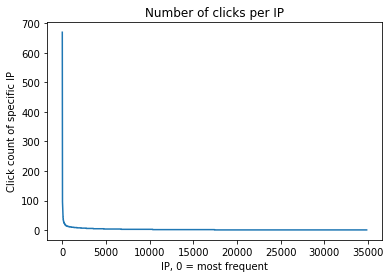

In [19]:
plt.plot(np.array(df['ip'].value_counts()))
plt.ylabel("Click count of specific IP")
plt.xlabel("IP, 0 = most frequent")
plt.title("Number of clicks per IP")

The overwhelming majority of IP addresses have less than 10 clicks.

Text(0.5,1,'Distribution of number of clicks per unique IP ')

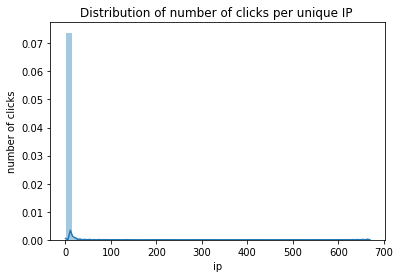

In [31]:
plot = sns.distplot(df['ip'].value_counts())
plot.set(ylabel = 'number of clicks')
plot.set_title("Distribution of number of clicks per unique IP ")

### App

161 unique app IDs (different advertisers). About 95% of the sample is comprised of the 20 most common app IDs. 

In [43]:
len(df['app'].value_counts())

161

In [44]:
sum(df['app'].value_counts().iloc[:20])/100000

0.94827

Text(0.5,1,'Number of clicks per app')

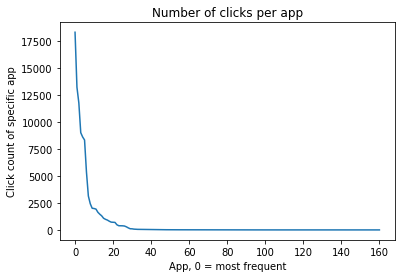

In [20]:
plt.plot(np.array(df['app'].value_counts()))
plt.ylabel("Click count of specific app")
plt.xlabel("App, 0 = most frequent")
plt.title("Number of clicks per app")

### Device

100 unique device ids. Almost 99% of the sample is comprised of 2 device types. Given that different versions of the same brand / model can be classed into distinct IDs, the level of homogeneity is surprising as you'd expect more spread.

In [45]:
len(df['device'].value_counts())

100

In [50]:
sum(df['device'].value_counts().iloc[:2])/100000

0.98683

In [59]:
df['device'].value_counts().head(5)

1       94338
2        4345
0         541
3032      371
3543      151
Name: device, dtype: int64

### Operating system

130 unique operating systems. Almost 95% of the sample is comprised of the most common 30 operating systems. Nothing unusual here.

In [52]:
len(df['os'].value_counts())

130

In [56]:
sum(df['os'].value_counts().iloc[:30])/100000

0.94908

Text(0.5,1,'Number of clicks per OS')

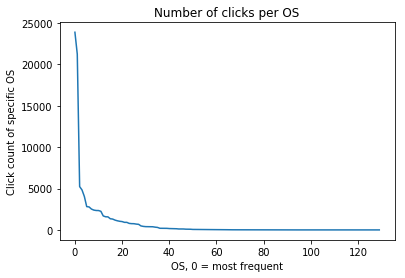

In [21]:
plt.plot(np.array(df['os'].value_counts()))
plt.ylabel("Click count of specific OS")
plt.xlabel("OS, 0 = most frequent")
plt.title("Number of clicks per OS")

### Channel

161 different channels. 99% of the sample is captured by the top 100 channels. Not a huge degree of concentration in channels. This is perhaps expected, as no one channel is the perfect medium to distribute advertisement spend.

In [57]:
len(df['channel'].value_counts())

161

In [63]:
sum(df['channel'].value_counts().iloc[:100])/100000

0.989

Text(0.5,1,'Number of clicks per channel')

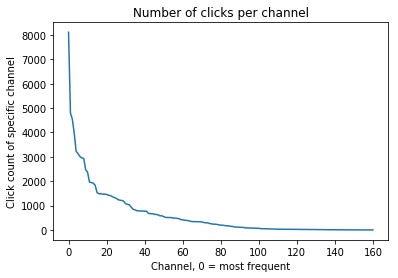

In [22]:
# np.array(range(len(df['channel'].value_counts())))
plt.plot(np.array(df['channel'].value_counts()))
plt.ylabel("Click count of specific channel")
plt.xlabel("Channel, 0 = most frequent")
plt.title("Number of clicks per channel")